<a href="https://colab.research.google.com/github/tjbingamon/Stroke-Prediction-Dataset/blob/main/Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stroke Prediction 

1. Source of data

2. Brief description of data

3. What is the target?

4. What does one row represent? (A person?  A business?  An event? A product?)

5. Is this a classification or regression problem?

6. How many features does the data have?

7. How many rows are in the dataset?

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?

#1. Source of data

[source link](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

#2. Brief description of data

- According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.


#3. What is the target?

- This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status.

#4. What does one row represent? (A person?  A business?  An event? A product?)

- a patient


#5. Is this a classification or regression problem?

- classification problem

# 6. How many features does the data have?

- 12 features

# 7. How many rows are in the dataset?

- 5110 rows

#8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?

- I believe there may be some outliers among the data. Will have to check each column to see if there are any inconsistencies as well. 


# **Import Libraries/Data**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

## Models
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression

# Regression Metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# Classification Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay


## Set global scikit-learn configuration 
from sklearn import set_config
## Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

# **Load Data**

In [4]:
# Load Data
df = pd.read_csv ('/content/drive/MyDrive/Homework Stuff/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# **Explore Data**

In [5]:
# Display the number of rows and columns for the dataframe
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 5110 rows, and 12 columns.
The rows represent 5110 observations, and the columns represent 11 features and 1 target variable.


In [6]:
# Display the column names, count of non-null values, and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
# Display shape of data
df.shape[0]

5110

In [8]:
# Check for missing values
missing_values = df.isnull()
print(missing_values)

         id  gender    age  hypertension  heart_disease  ever_married  \
0     False   False  False         False          False         False   
1     False   False  False         False          False         False   
2     False   False  False         False          False         False   
3     False   False  False         False          False         False   
4     False   False  False         False          False         False   
...     ...     ...    ...           ...            ...           ...   
5105  False   False  False         False          False         False   
5106  False   False  False         False          False         False   
5107  False   False  False         False          False         False   
5108  False   False  False         False          False         False   
5109  False   False  False         False          False         False   

      work_type  Residence_type  avg_glucose_level    bmi  smoking_status  \
0         False           False              F

In [9]:
# percentage of missing data per column
(df.isna().sum()/df.shape[0]) * 100

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [10]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

- We will not need to use SimpleImputer in our preprocessing steps.

- **Never impute values prior to Train_Test_Split, as it would cause data leakage.**

# Remove Unneccessary Rows

### Duplicates

In [11]:
# Check for duplicates
df.duplicated().sum()

0

- there are no dupicate rows

### **Inspect Values for Errors**

- Check for unusual or impossible values. (Example a weight, or height that is negative in value.)

In [12]:
# Display the descriptive statistics for the non-numeric columns
df.describe(include="number")

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


- There is a "O.O8" in the age column, this may have been an error from the person inputing the data.

# Inconsistent Data (Object)

In [13]:
# Check for and address any inconsistent values in categorical columns.
df.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [14]:
# Display Object data types
df.dtypes[df.dtypes == 'object']

gender            object
ever_married      object
work_type         object
Residence_type    object
smoking_status    object
dtype: object

In [15]:
for i in df.dtypes[df.dtypes == 'object'].index:
  print(f'{i} ---')
  print(df[i].value_counts())
  print("")

gender ---
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

ever_married ---
Yes    3353
No     1757
Name: ever_married, dtype: int64

work_type ---
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

Residence_type ---
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

smoking_status ---
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64



In the "Gender" column, we have 1 person as "other". We can leave this alone as this person may identify themselves as non-binary.

# **Exploratory Visualizations**

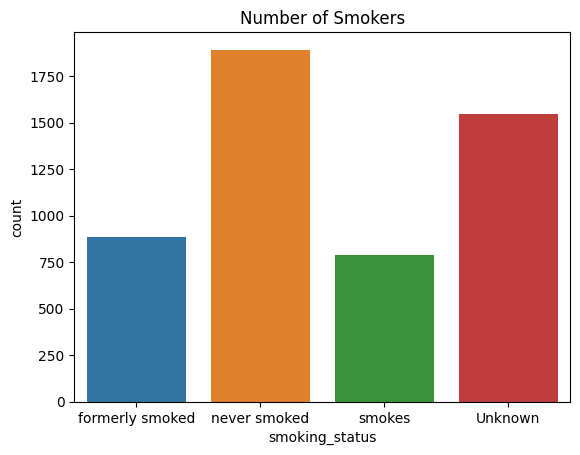

In [28]:
# Check univariate distributions and explore categorical variable(s)
ax = sns.countplot(x=df['smoking_status'])
ax.set_title('Number of Smokers');

- The graph shows that are a great number of patients who have never smoked. We can also see that a great number of patients did not disclose their status.

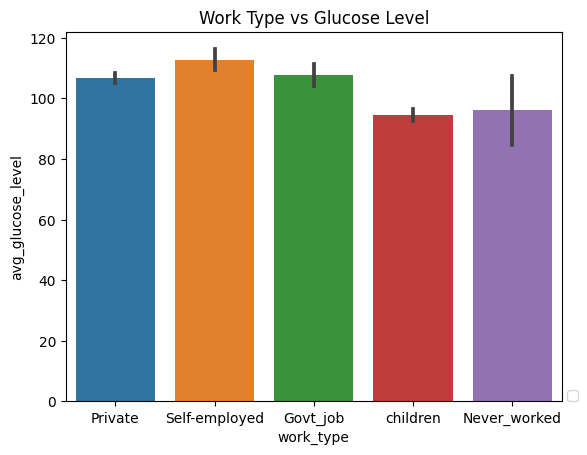

In [37]:
## Define a MatplotLib ax object using sns.barplot()
ax = sns.barplot(x= 'work_type', y = 'avg_glucose_level', data = df)

## Rotate the tick values
ax.tick_params(rotation = 0)

## Set the Title
ax.set_title('Work Type vs Glucose Level');
## Note Seaborn automatically sets X and Y axis labels

## Set the Legend location
## Set the Legend location
ax.legend(loc = (1.01, 0));

- Our first three columns show high glucose levels, but our "Never_worked" column has many outliers.